# Breast Cancer Gene Expression Data Exploration

This notebook explores the processed breast cancer gene expression dataset for NAC response prediction.

Import required libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


sns.set(style='whitegrid')

# Load the processed data

In [18]:
df = pd.read_csv('../processed/cleaned_expression.csv', index_col=0)
labels = pd.read_csv('../processed/labels.csv', index_col=0)

print('Data shape:', df.shape)
print('Labels shape:', labels.shape)
print(df.head())
print(labels.head())

Data shape: (51, 28279)
Labels shape: (58, 1)
               A1BG  A1BG-AS1  A1CF    A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
F71B-Tn-C_S2     50        13     3  11275       48   5851      1        6   
X116BBp-C_S11    42         3     3  14324      182     43      0        2   
X090B-Bn_S6     226        71     0  22473      106     17      0        1   
X047B-Bn-C_S3   121        39     1  12556      121      6      1        1   
X260B-Bp-C_S5    70        25    17  19076       94      9      0        0   

               A4GALT  A4GNT  ...  ZWINT  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  \
F71B-Tn-C_S2      146      6  ...     59   325   419   661     533     736   
X116BBp-C_S11     107     13  ...    343   386   406  1036     211    1001   
X090B-Bn_S6       363      9  ...    177   235   323  1119     586    1518   
X047B-Bn-C_S3     190      8  ...    222   303   630   736     119     785   
X260B-Bp-C_S5     102      6  ...    698   386   647   758     367    1194   

                

In [ ]:

print('Response distribution:')
print(df['Response'].value_counts())

print('\nGene expression summary:')
print(df.drop('Response', axis=1).describe())

Response distribution:
Response
0    26
1    25
Name: count, dtype: int64

Gene expression summary:


# Visualize response distribution

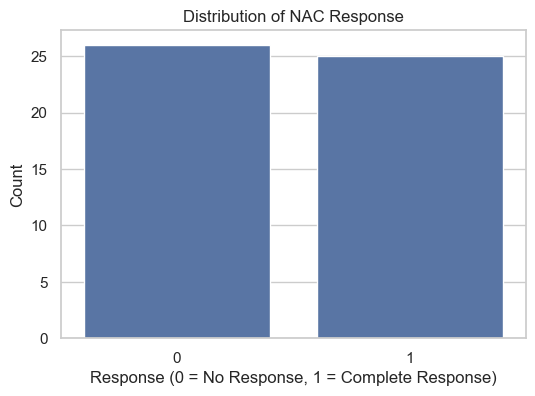

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df)
plt.title('Distribution of NAC Response')
plt.xlabel('Response (0 = No Response, 1 = Complete Response)')
plt.ylabel('Count')
plt.show()

# PCA for dimensionality reduction and visualization

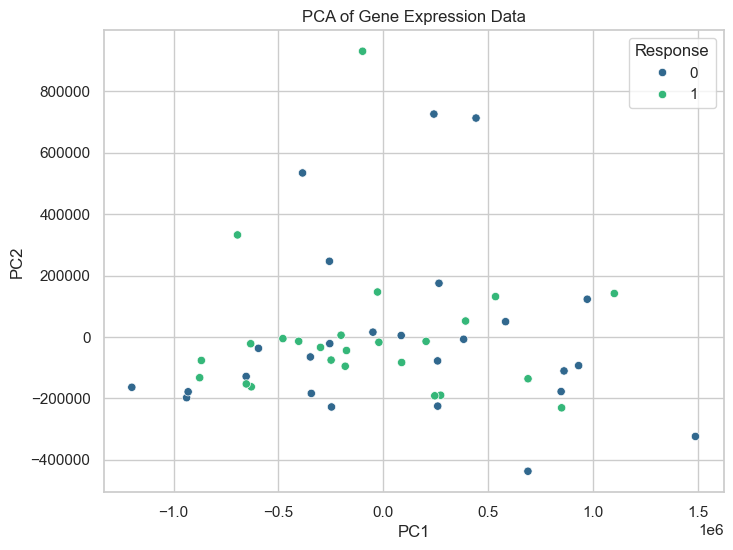

Explained variance ratio: [0.67668872 0.12240636]


In [ ]:

X = df.drop('Response', axis=1)
y = df['Response']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA of Gene Expression Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Response')
plt.show()

print('Explained variance ratio:', pca.explained_variance_ratio_)